In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm

"""
Loads Political_Bias_Classifier.ipynb into this notebook - will
run file to extract functions and pre-trained classifier
"""
from ipynb.fs.full.Political_Bias_Classifier import *

def plot_source(data, source):
    
    """
    Input: 
        data - The read-in Pandas DataFrame of the dataset
        source - Name of a news source in the dataset
    Output: 
        Call to form_plot with calculated averages
    """

    #Cleaning the text and date data for the source
    source_data = data[data['publication'] == source]
    source_data['content'] = source_data['content'].apply(clean_text)
    source_data['date'] = pd.to_datetime(source_data['date'], 
                                         infer_datetime_format=True)
    
    #Filter out articles before 2016
    starting_month = pd.to_datetime("2016-01-01")
    source_data = source_data[source_data['date'] >= starting_month]
    
    current_month = starting_month
    ending_month = pd.to_datetime(max(source_data['date']))
    monthly_averages = []
    
    while current_month <= ending_month:
        
        #Extracts the text for all of the articles in the current month
        monthly_articles = source_data[source_data['date'].dt.year == current_month.year]
        monthly_articles = monthly_articles['content'][monthly_articles['date'].dt.month
                                                       == current_month.month]
        
        #Appends mean bias score for current month onto monthly_averages list
        monthly_averages.append(np.mean([np.argmax(data_pipeline.predict_proba([article])) 
                                         for article in monthly_articles]))
        
        current_month += pd.Timedelta(30, unit="d")
    
    form_plot(monthly_averages, source)
    

def form_plot(averages, source):
    
    """
    Input:
        averages - Calculated monthly average political bias score for given source
        source - Name of the source that has been analyzed
    Output:
        Line graph of average monthly bias scores over analysis period
        Results of linear regression analysis on bias values
    """
    
    #Setting up the plot characteristics
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    plt.plot(np.arange(len(averages)), averages)
    title = "Political Bias Trends for " + source
    plt.title(title)
    plt.ylim(0, 4)
    
    #Setting the tick marks for the x-axis
    x_ticks = pd.date_range(start = "1/1/2016", periods= len(averages), freq='M')
    plt.xticks(np.arange(len(x_ticks)), 
               [str(x.year) + "-" + str(x.month) for x in x_ticks],
              rotation = 20)
    
    #Setting the tick marks for the y-axis
    y_ticks = ['Left', 'Left Leaning', 'Unbiased', 'Right Leaning', 'Right']
    plt.yticks(np.arange(len(y_ticks)), y_ticks, rotation=20)
    
    #Fitting and plotting the regression model
    x = np.arange(len(averages))
    x = sm.add_constant(x, prepend=False)
    model = sm.OLS(averages, x)
    result = model.fit()
    seq = np.arange(len(averages))
    plt.plot(seq, result.params[0]*seq + result.params[1], '--')
    
    plt.show()
    
    #Prints a summary of the regression statistics
    print(result.summary())

C:\Users\elire\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\elire\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


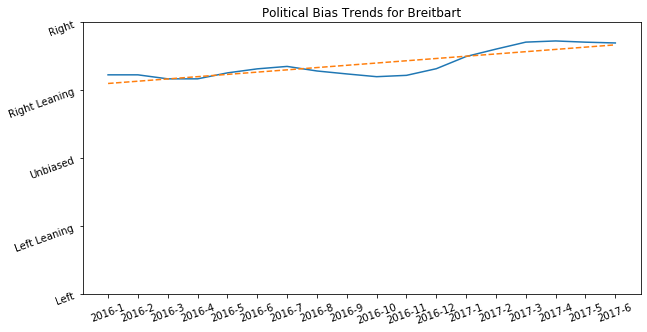

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     42.16
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           7.42e-06
Time:                        16:29:26   Log-Likelihood:                 14.715
No. Observations:                  18   AIC:                            -25.43
Df Residuals:                      16   BIC:                            -23.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0334      0.005      6.493      0.0

C:\Users\elire\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [4]:
data = pd.read_csv("Trend_Data.csv")
plot_source(data, "Breitbart")